# A* Implementation 

In [1]:
import matplotlib.pyplot as plt
from matplotlib.collections import PatchCollection
import matplotlib.patches as Patch
import matplotlib.lines as Lines
import numpy as np

In [2]:
# Define parameters
x_numNodes=15
y_numNodes=15
start=(0,0)
goal=(14,14)
obs=((2,9),(7,4),(6,4),(5,4),(5,5),(5,6),(5,7),(5,8),(4,8),(3,8),(12,13),(13,13),(14,13))
grid_node_unit=1

# Define colors
alpha=1
edge_color='None'
obs_color='gray'
start_color='r'
goal_color='b'
checked_color='g'

In [9]:
# Perform A* search

# Find the eulidean distance between two nodes
def dist(node1,node2):
    d=np.sqrt((node1[0]-node2[0])**2+(node1[1]-node2[1])**2)
    return d

# Use heuristic of euclidean distance between current node and goal
def h(node):
    d=dist(node,goal)
    return d

# Find the neighbors of the node that is traversable
def neighbor(node):
    neighbor=[]
#     adjacent_list=[-1,1]
    adjacent_list=[-1,0,1]
    # Check corners
    for i in adjacent_list:
        for j in adjacent_list:
            check=(node[0]+i,node[1]+j)
            #corner_sides=((node[0]+i,node[1]),(node[0],node[1]+j))
            if check!=node and not check[0]<0 and not check[0]>x_numNodes-1 and not check[1]<0 and\
            not check[1]>y_numNodes-1 and not any([obstacle for obstacle in obs if check==obstacle]):# \
#             or corner_sides[0]==obstacle or corner_sides[1]==obstacle]):
                neighbor.append(check)
    
#     for k in adjacent_list:
#         check=((node[0]+k,node[1]),(node[0],node[1]+k))
#         for n in check:
#             if n!=node and not n[0]<0 and not n[0]>x_numNodes-1 and not n[1]<0 and\
#             not n[1]>y_numNodes-1 and not any([obstacle for obstacle in obs if n==obstacle]):
#                 neighbor.append(n)
    return neighbor

# Use this function to sort list (imitation of priority queue)
def sortSecond(open_node):
    return open_node[1]

# Create map that lists previous node of current node
cameFrom=np.full((x_numNodes,y_numNodes),np.nan,dtype=(int,2))

# G=euclidean distance traveled between nodes
gCost=np.full((x_numNodes,y_numNodes),np.inf)
gCost[start]=0

# F=G+h
fCost=np.full((x_numNodes,y_numNodes),np.inf)
fCost[start]=h(start)

openset=[(start,fCost[start])]
closedset=[]

while openset:
    current=openset.pop(0)[0]
    if current==goal:
        break
    closedset.append(current)
    for n in neighbor(current):
        if n in closedset:
            continue
        total_gCost=gCost[current]+dist(current,n)
        if total_gCost<gCost[n]:
            cameFrom[n]=current
            gCost[n]=total_gCost
            fCost[n]=total_gCost+h(n)
            if not any(open_node for open_node in openset if open_node[0]==n):
                openset.append((n,fCost[n]))
                openset.sort(key=sortSecond)
    if not openset:
        print('Failure: Goal could not be reached')

# Find the path from start to goal
path=[]
path.append(goal)
reachedGoal=False
while not reachedGoal:
    prev=tuple(cameFrom[path[-1]])
    path.append(prev)
    if path[-1]==start:
        reachedGoal=True
path.reverse()

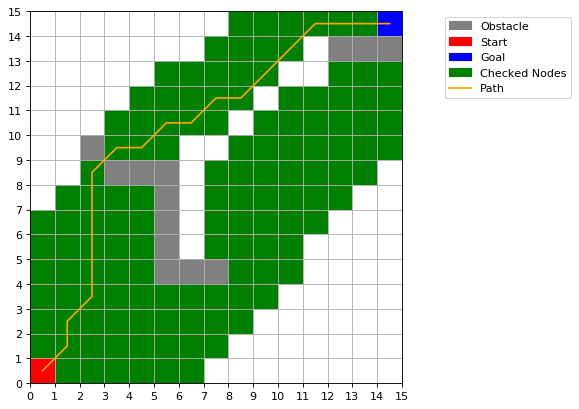

In [10]:
# Draw a blank figure with a grid
fig=plt.figure(figsize=(6,8.333),dpi=80)
ax=fig.add_subplot(111,autoscale_on=False,xlim=(0,x_numNodes),ylim=(0,y_numNodes))
ax.set_aspect('equal')
grid=range(0,x_numNodes+1,grid_node_unit)
ax.set_xticks(grid)
ax.set_yticks(grid)

# Color in the obstacle nodes
obs_list=[]
for i in obs:
    rect=Patch.Rectangle(i,grid_node_unit,grid_node_unit)
    obs_list.append(rect)
pc=PatchCollection(obs_list,facecolor=obs_color,alpha=alpha,edgecolor=edge_color)
ax.add_collection(pc)

# Color in the checked nodes
checked_node=[]
for j in closedset:
    rect=Patch.Rectangle(j,grid_node_unit,grid_node_unit)
    checked_node.append(rect)
pc=PatchCollection(checked_node,facecolor=checked_color,alpha=alpha,edgecolor=edge_color)
ax.add_collection(pc)

# Color in the start and goal nodes
start_list, goal_list=[],[]
start_list.append(Patch.Rectangle((start),1,1))
goal_list.append(Patch.Rectangle((goal),grid_node_unit,grid_node_unit))
pc=PatchCollection(start_list,facecolor=start_color,alpha=alpha,edgecolor=edge_color)
ax.add_collection(pc)
pc=PatchCollection(goal_list,facecolor=goal_color,alpha=alpha,edgecolor=edge_color)
ax.add_collection(pc)

# Draw the final path
path_label=Lines.Line2D([],[],color='orange',label='Path')
ax.plot([x[0]+0.5 for x in path],[y[1]+0.5 for y in path],'-',color='orange')

plt.grid(True)
obs_patch=Patch.Patch(color=obs_color,label='Obstacle')
start_patch=Patch.Patch(color=start_color,label='Start')
goal_patch=Patch.Patch(color=goal_color,label='Goal')
checked_patch=Patch.Patch(color=checked_color,label='Checked Nodes')
ax.legend(handles=[obs_patch,start_patch,goal_patch,checked_patch,path_label],bbox_to_anchor=(1.1,1))
plt.show()

In [11]:
total=0
for j in range(len(path)-1):
    total+=dist(path[j],path[j+1])
print("Start: {0}, Goal: {1}".format(start,goal))
print("Number of nodes checked: {0:1}".format(len(closedset)))
print("Path distance: {0:2.4f}".format(total))

Start: (0, 0), Goal: (14, 14)
Number of nodes checked: 128
Path distance: 23.3137
